In [1]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords, words
from nltk import word_tokenize
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [2]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/data/All_Friends_data.csv"
df = pd.read_csv(url, error_bad_lines=False)

In [3]:
df = df.drop("Unnamed: 0",axis=1)

In [4]:
# function for clearing lines
def cleanLines(line):
    #Exclude links
    line = re.sub(r'\([^)]*\)','',line)
    #Remove everything besides letters
    line = re.sub("([^a-z \t])|(\w+:\/\/\S+)", "", line)
    #Create a string for tweet
    line = [''.join(s for s in line)]
    return(line) 

In [5]:
#create list of real words
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

In [6]:
#Add words to stopwords
stopWords = nltk.corpus.stopwords.words('english')
newStopWords = ["like","get","yeah","know","gonna","hey","uh","oh","well","okay","im","dont","youre","thats","got"]
stopWords.extend(newStopWords)

In [7]:
#Find episodes  of each season
s1 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(1[0-2][1-9])')].reset_index(drop=True)
s2 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(2[0-2][1-9])')].reset_index(drop=True)
s3 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(3[0-2][1-9])')].reset_index(drop=True)
s4 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(4[0-2][1-9])')].reset_index(drop=True)
s5 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(5[0-2][1-9])')].reset_index(drop=True)
s6 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(6[0-2][1-9])')].reset_index(drop=True)
s7 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(7[0-2][1-9])')].reset_index(drop=True)
s8 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(8[0-2][1-9])')].reset_index(drop=True)
s9 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(9[0-2][1-9])')].reset_index(drop=True)
s10 = df[['Speaker','Text','Scene']][df['Episode'].str.match(pat = '(10[0-2][1-9])')].reset_index(drop=True)

In [8]:
mainch = ["joey","rachel","ross","chandler","monica","phoebe"]

In [9]:
#Create list for what words the characters uses in the seasons
allwords = []
liness1 = []
for character in mainch:
    says = s1.Text[[character in i for i in s1.Speaker.str.split("\b")]].reset_index(drop=True)
    for i in range(len(says)):
        words = [w for w in says[i].split() if w in english_vocab and w not in stopWords]
        liness1.extend(words)
allwords.extend(liness1)
    
liness2 = []
for character in mainch:
    says = s2.Text[[character in i for i in s2.Speaker.str.split("\b")]].reset_index(drop=True)
    for i in range(len(says)):
        words = [w for w in says[i].split() if w in english_vocab and w not in stopWords]
        liness2.extend(words)
allwords.extend(liness2)
        
liness3 = []
for character in mainch:
    says = s3.Text[[character in i for i in s3.Speaker.str.split("\b")]].reset_index(drop=True)
    for i in range(len(says)):
        words = [w for w in says[i].split() if w in english_vocab and w not in stopWords]
        liness3.extend(words)
allwords.extend(liness3)

liness4 = []
for character in mainch:
    says = s4.Text[[character in i for i in s4.Speaker.str.split("\b")]].reset_index(drop=True)
    for i in range(len(says)):
        words = [w for w in says[i].split() if w in english_vocab and w not in stopWords]
        liness4.extend(words)
allwords.extend(liness4)

liness5 = []
for character in mainch:
    says = s5.Text[[character in i for i in s5.Speaker.str.split("\b")]].reset_index(drop=True)
    for i in range(len(says)):
        words = [w for w in says[i].split() if w in english_vocab and w not in stopWords]
        liness5.extend(words)
allwords.extend(liness5)

liness6 = []
for character in mainch:
    says = s6.Text[[character in i for i in s6.Speaker.str.split("\b")]].reset_index(drop=True)
    for i in range(len(says)):
        words = [w for w in says[i].split() if w in english_vocab and w not in stopWords]
        liness6.extend(words)
allwords.extend(liness6)
    
liness7 = []
for character in mainch:
    says = s7.Text[[character in i for i in s7.Speaker.str.split("\b")]].reset_index(drop=True)
    for i in range(len(says)):
        words = [w for w in says[i].split() if w in english_vocab and w not in stopWords]
        liness7.extend(words)
allwords.extend(liness7)

liness8 = []
for character in mainch:
    says = s8.Text[[character in i for i in s8.Speaker.str.split("\b")]].reset_index(drop=True)
    for i in range(len(says)):
        words = [w for w in says[i].split() if w in english_vocab and w not in stopWords]
        liness8.extend(words)
allwords.extend(liness8)
    
liness9 = []
for character in mainch:
    says = s9.Text[[character in i for i in s9.Speaker.str.split("\b")]].reset_index(drop=True)
    for i in range(len(says)):
        words = [w for w in says[i].split() if w in english_vocab and w not in stopWords]
        liness9.extend(words)
allwords.extend(liness9)

liness10 = []
for character in mainch:
    says = s10.Text[[character in i for i in s10.Speaker.str.split("\b")]].reset_index(drop=True)
    for i in range(len(says)):
        words = [w for w in says[i].split() if w in english_vocab and w not in stopWords]
        liness10.extend(words)
allwords.extend(liness10)
    

In [10]:
# Calculate the TF of the seasons:
theysay = liness1
TF_s1_words = FreqDist(theysay)
TF_s1 = {a:(b/len(theysay)) for (a,b) in TF_s1_words.most_common()}
# Calculate the TF
TF_s1_words = FreqDist(theysay)
TF_s1 = {a:(b/len(theysay)) for (a,b) in TF_s1_words.most_common()}

theysay = liness2
TF_s2_words = FreqDist(theysay)
TF_s2 = {a:(b/len(theysay)) for (a,b) in TF_s2_words.most_common()}
# Calculate the TF
TF_s2_words = FreqDist(theysay)
TF_s2 = {a:(b/len(theysay)) for (a,b) in TF_s2_words.most_common()}

theysay = liness3
TF_s3_words = FreqDist(theysay)
TF_s3 = {a:(b/len(theysay)) for (a,b) in TF_s3_words.most_common()}
# Calculate the TF
TF_s3_words = FreqDist(theysay)
TF_s3 = {a:(b/len(theysay)) for (a,b) in TF_s3_words.most_common()}

theysay = liness4
TF_s4_words = FreqDist(theysay)
TF_s4 = {a:(b/len(theysay)) for (a,b) in TF_s4_words.most_common()}
# Calculate the TF
TF_s4_words = FreqDist(theysay)
TF_s4 = {a:(b/len(theysay)) for (a,b) in TF_s4_words.most_common()}

theysay = liness5
TF_s5_words = FreqDist(theysay)
TF_s5 = {a:(b/len(theysay)) for (a,b) in TF_s5_words.most_common()}
# Calculate the TF
TF_s5_words = FreqDist(theysay)
TF_s5 = {a:(b/len(theysay)) for (a,b) in TF_s5_words.most_common()}

theysay = liness6
TF_s6_words = FreqDist(theysay)
TF_s6 = {a:(b/len(theysay)) for (a,b) in TF_s6_words.most_common()}
# Calculate the TF
TF_s6_words = FreqDist(theysay)
TF_s6 = {a:(b/len(theysay)) for (a,b) in TF_s6_words.most_common()}

theysay = liness7
TF_s7_words = FreqDist(theysay)
TF_s7 = {a:(b/len(theysay)) for (a,b) in TF_s7_words.most_common()}
# Calculate the TF
TF_s7_words = FreqDist(theysay)
TF_s7 = {a:(b/len(theysay)) for (a,b) in TF_s7_words.most_common()}

theysay = liness8
TF_s8_words = FreqDist(theysay)
TF_s8 = {a:(b/len(theysay)) for (a,b) in TF_s8_words.most_common()}
# Calculate the TF
TF_s8_words = FreqDist(theysay)
TF_s8 = {a:(b/len(theysay)) for (a,b) in TF_s8_words.most_common()}

theysay = liness9
TF_s9_words = FreqDist(theysay)
TF_s9 = {a:(b/len(theysay)) for (a,b) in TF_s9_words.most_common()}
# Calculate the TF
TF_s9_words = FreqDist(theysay)
TF_s9 = {a:(b/len(theysay)) for (a,b) in TF_s9_words.most_common()}

theysay = liness10
TF_s10_words = FreqDist(theysay)
TF_s10 = {a:(b/len(theysay)) for (a,b) in TF_s10_words.most_common()}
# Calculate the TF
TF_s10_words = FreqDist(theysay)
TF_s10 = {a:(b/len(theysay)) for (a,b) in TF_s10_words.most_common()}


In [11]:
# Calculate the IDF for each word:
IDF = {}
for word in np.unique(allwords):
    denomi = 0
    if word in liness1: 
        denomi+=1
    if word in liness2: 
        denomi+=1
    if word in liness3: 
        denomi+=1
    if word in liness4: 
        denomi+=1
    if word in liness5: 
        denomi+=1
    if word in liness6: 
        denomi+=1
    if word in liness7: 
        denomi+=1
    if word in liness8: 
        denomi+=1
    if word in liness9: 
        denomi+=1
    if word in liness10: 
        denomi+=1

    IDF[word] = np.log( 2 / (denomi))

In [12]:
# Calcualte the TF-IDF of each season
TF_IDF_s1 = {}
for word in TF_s1.items():
    TF_IDF_s1[word[0]] = word[1] * IDF[word[0]]
TF_IDF_s1 = sorted(TF_IDF_s1.items(), key=lambda kv: kv[1],reverse = True)

TF_IDF_s2 = {}
for word in TF_s2.items():
    TF_IDF_s2[word[0]] = word[1] * IDF[word[0]]
TF_IDF_s2 = sorted(TF_IDF_s2.items(), key=lambda kv: kv[1],reverse = True)

TF_IDF_s3 = {}
for word in TF_s3.items():
    TF_IDF_s3[word[0]] = word[1] * IDF[word[0]]
TF_IDF_s3 = sorted(TF_IDF_s3.items(), key=lambda kv: kv[1],reverse = True)

TF_IDF_s4 = {}
for word in TF_s4.items():
    TF_IDF_s4[word[0]] = word[1] * IDF[word[0]]
TF_IDF_s4 = sorted(TF_IDF_s4.items(), key=lambda kv: kv[1],reverse = True)

TF_IDF_s5 = {}
for word in TF_s5.items():
    TF_IDF_s5[word[0]] = word[1] * IDF[word[0]]
TF_IDF_s5 = sorted(TF_IDF_s5.items(), key=lambda kv: kv[1],reverse = True)

TF_IDF_s6 = {}
for word in TF_s6.items():
    TF_IDF_s6[word[0]] = word[1] * IDF[word[0]]
TF_IDF_s6 = sorted(TF_IDF_s6.items(), key=lambda kv: kv[1],reverse = True)

TF_IDF_s7 = {}
for word in TF_s7.items():
    TF_IDF_s7[word[0]] = word[1] * IDF[word[0]]
TF_IDF_s7 = sorted(TF_IDF_s7.items(), key=lambda kv: kv[1],reverse = True)

TF_IDF_s8 = {}
for word in TF_s8.items():
    TF_IDF_s8[word[0]] = word[1] * IDF[word[0]]
TF_IDF_s8 = sorted(TF_IDF_s8.items(), key=lambda kv: kv[1],reverse = True)

TF_IDF_s9 = {}
for word in TF_s9.items():
    TF_IDF_s9[word[0]] = word[1] * IDF[word[0]]
TF_IDF_s9 = sorted(TF_IDF_s9.items(), key=lambda kv: kv[1],reverse = True)

TF_IDF_s10 = {}
for word in TF_s10.items():
    TF_IDF_s10[word[0]] = word[1] * IDF[word[0]]
TF_IDF_s10 = sorted(TF_IDF_s10.items(), key=lambda kv: kv[1],reverse = True)


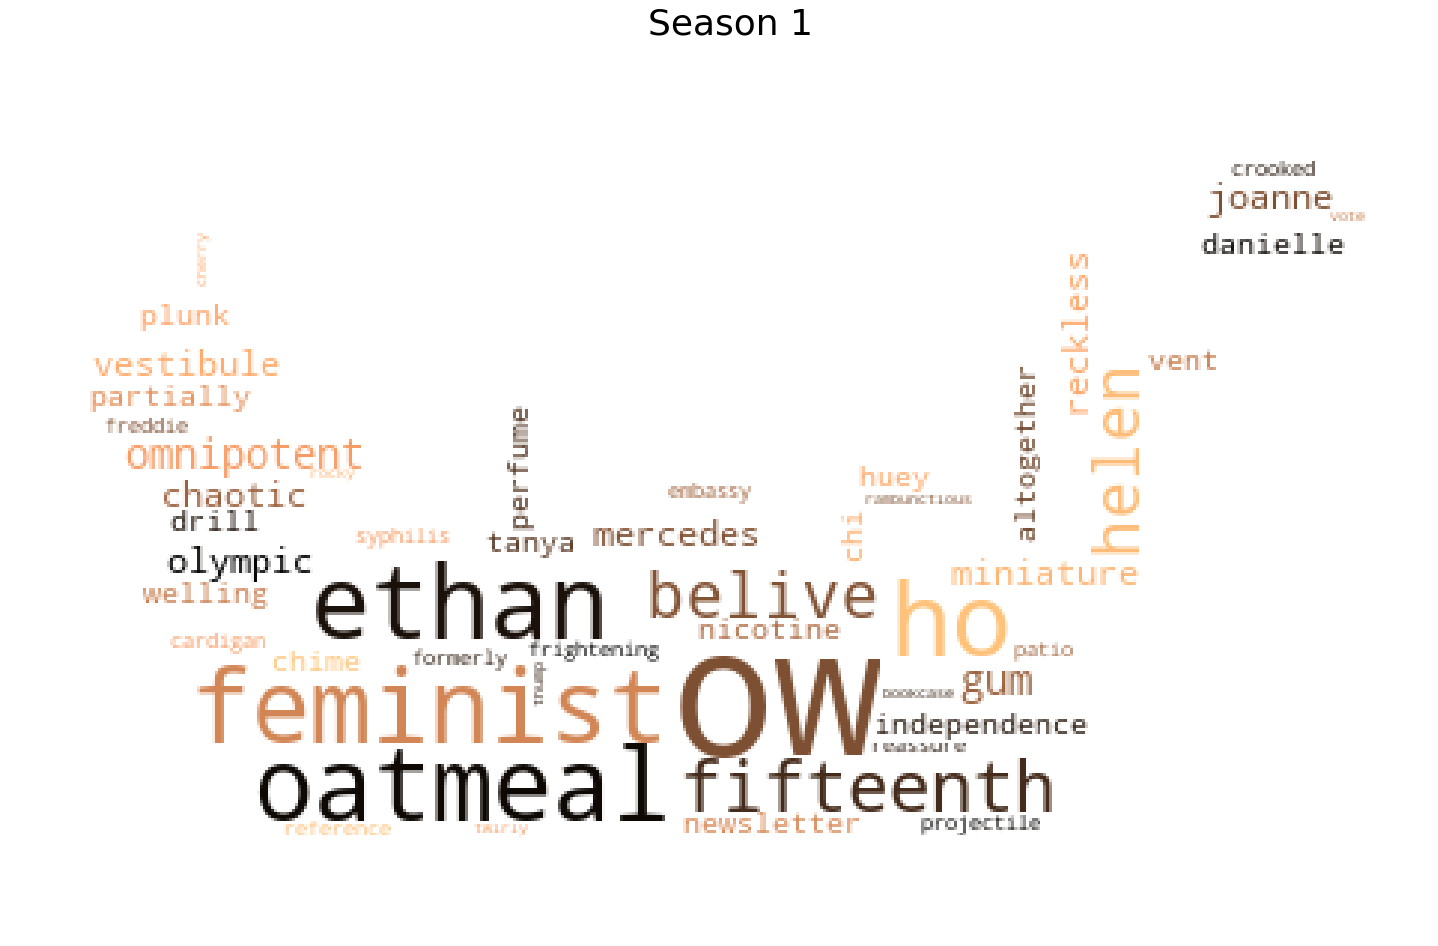

In [13]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/figures/Friends_siluet.PNG"
response = requests.get(url)
img = np.array(Image.open(BytesIO(response.content)))


plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'copper',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_s1)));
plt.axis('off');
plt.title('Season 1',fontsize = 36);
#plt.savefig("wordcloud_s1",transparent = True)
plt.show()

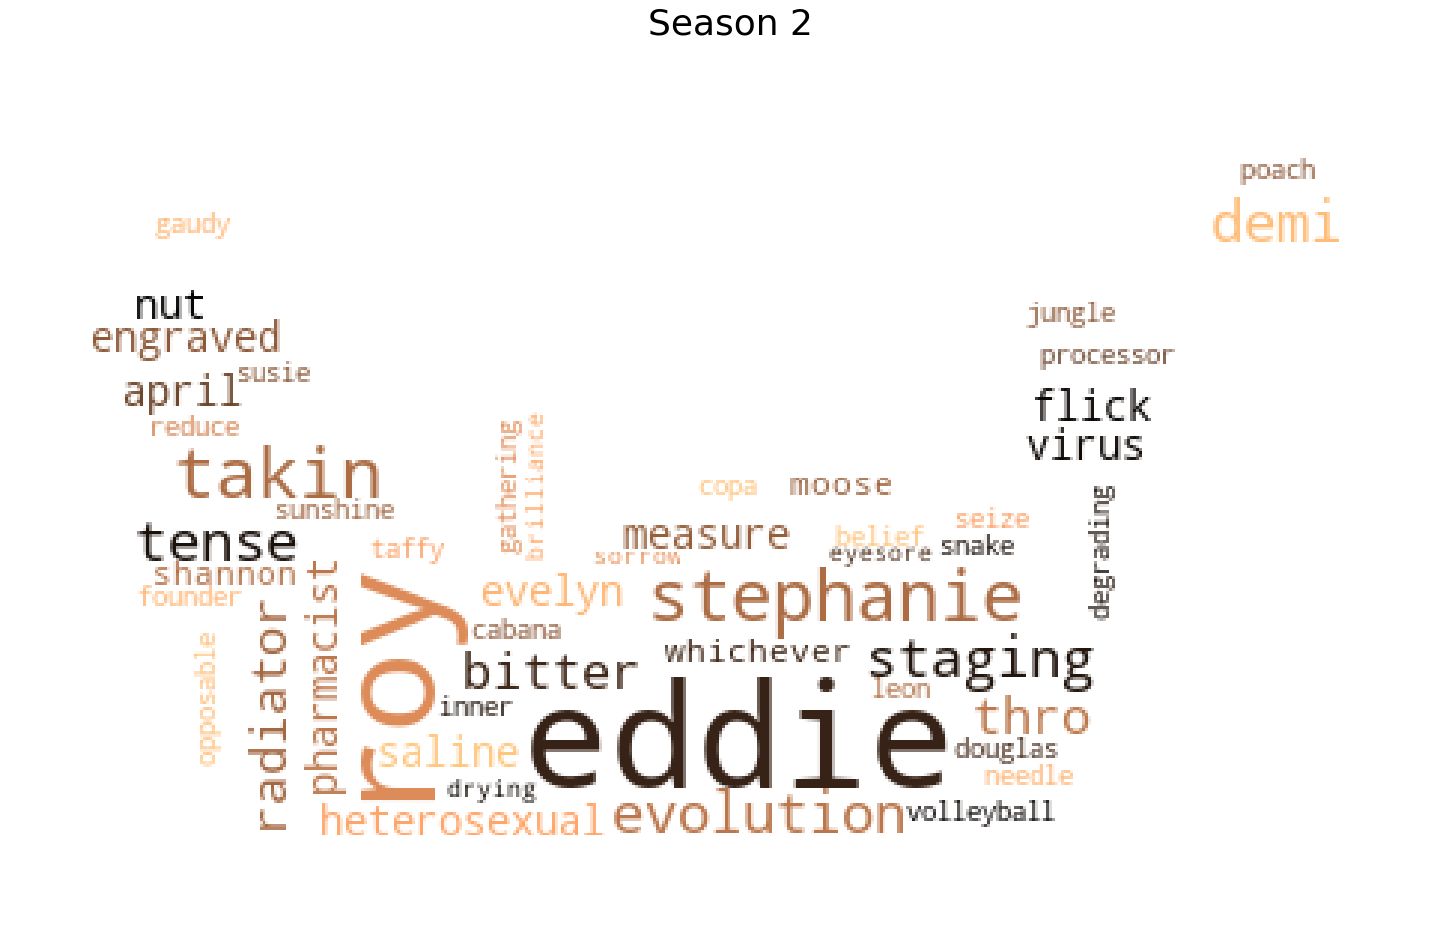

In [14]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'copper',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_s2)));
plt.axis('off');
plt.title('Season 2',fontsize = 36);
#plt.savefig("wordcloud_s2",transparent = True)
plt.show()

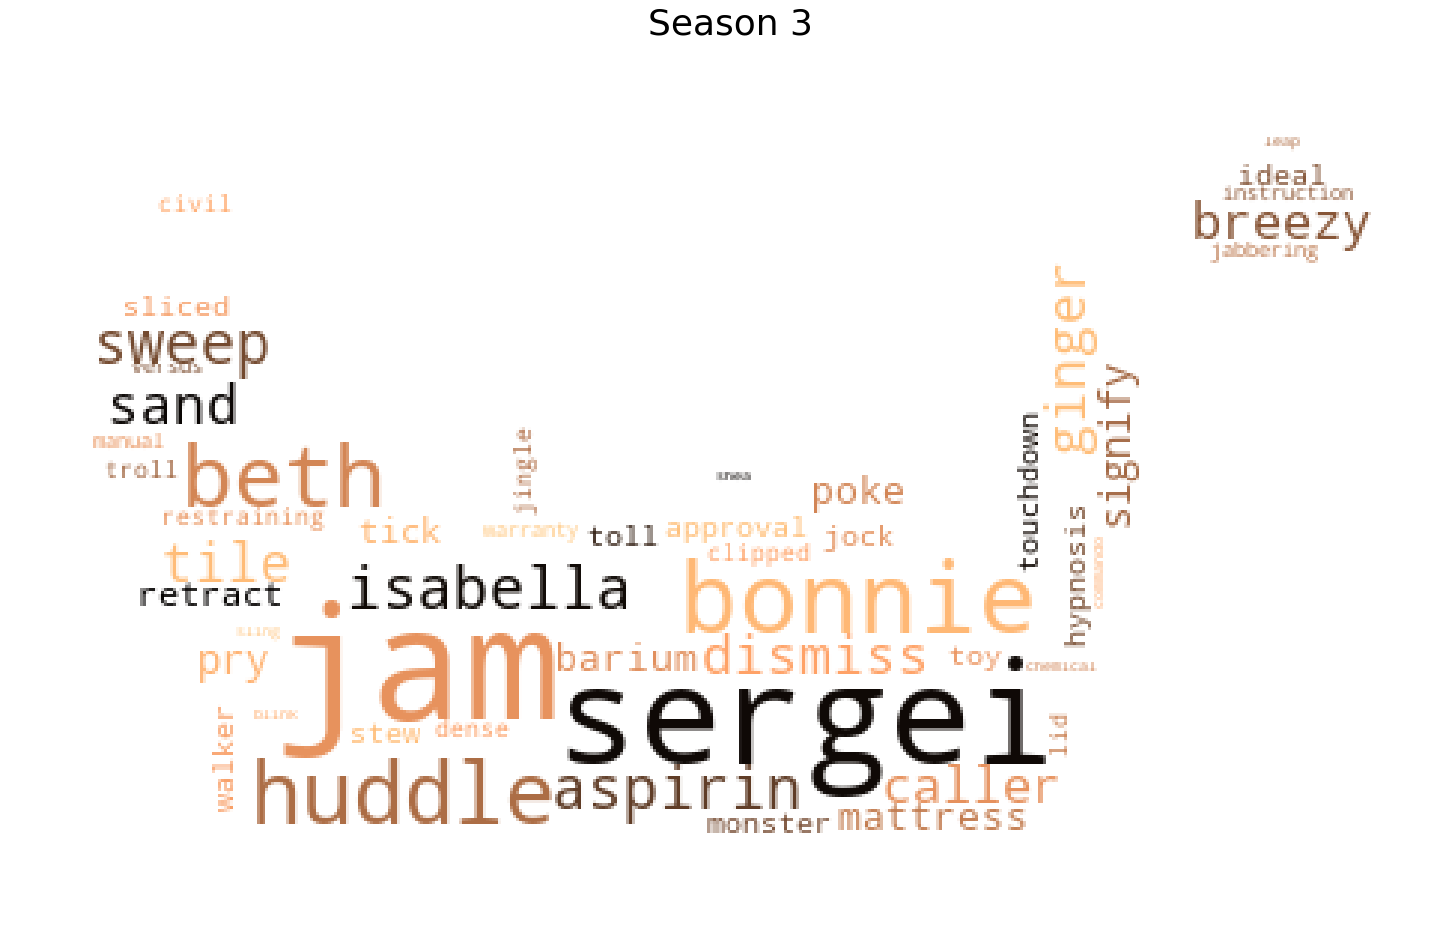

In [15]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'copper',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_s3)));
plt.axis('off');
plt.title('Season 3',fontsize = 36);
#plt.savefig("wordcloud_s3",transparent = True)
plt.show()

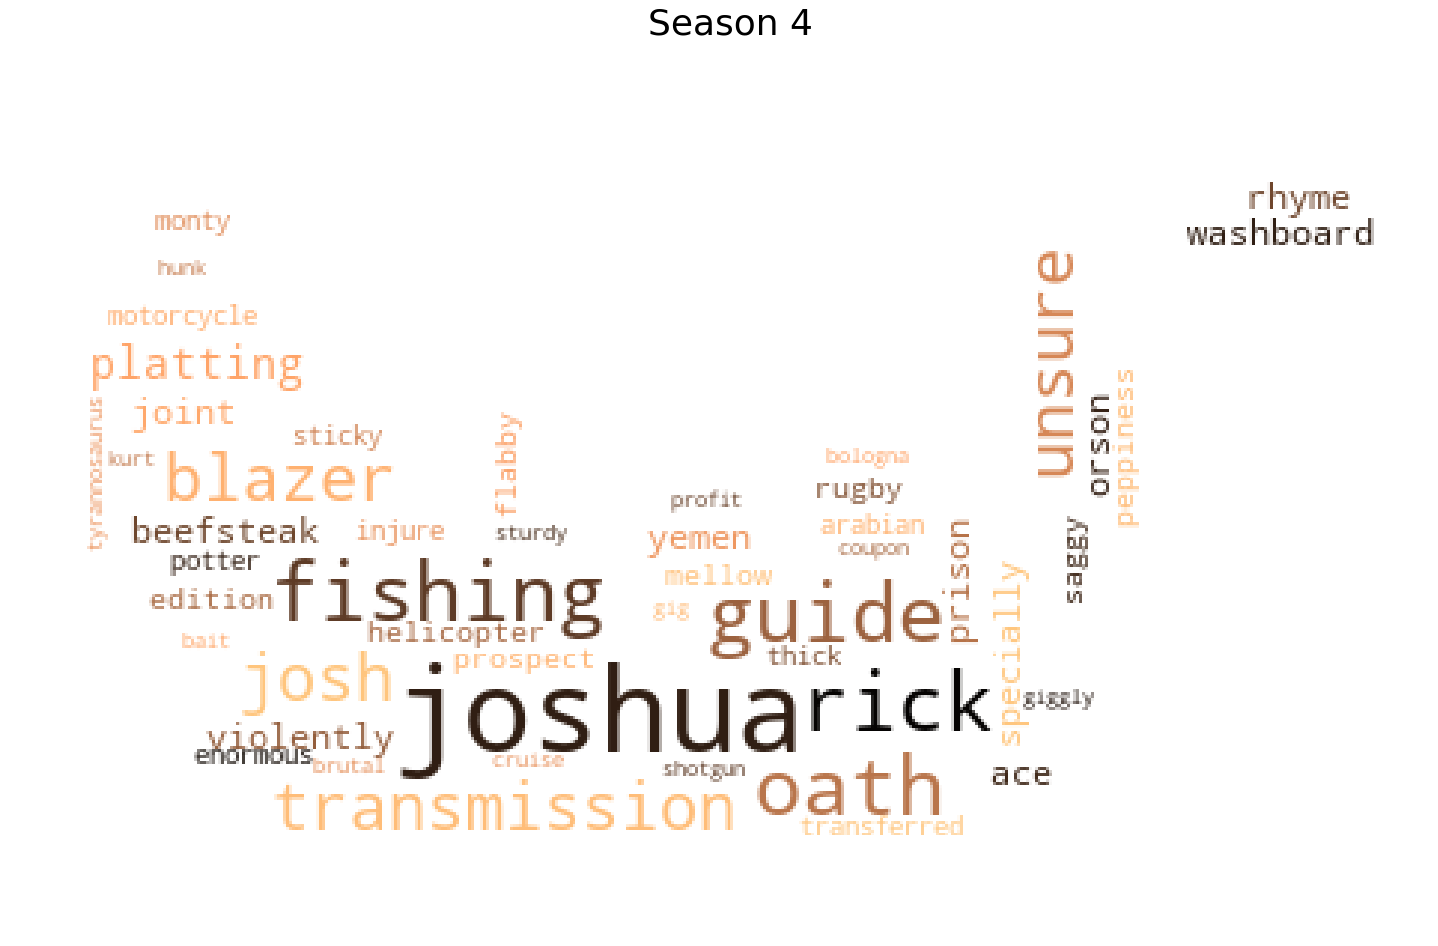

In [16]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'copper',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_s4)));
plt.axis('off');
plt.title('Season 4',fontsize = 36);
#plt.savefig("wordcloud_s4",transparent = True, DPI = 200)
plt.show()

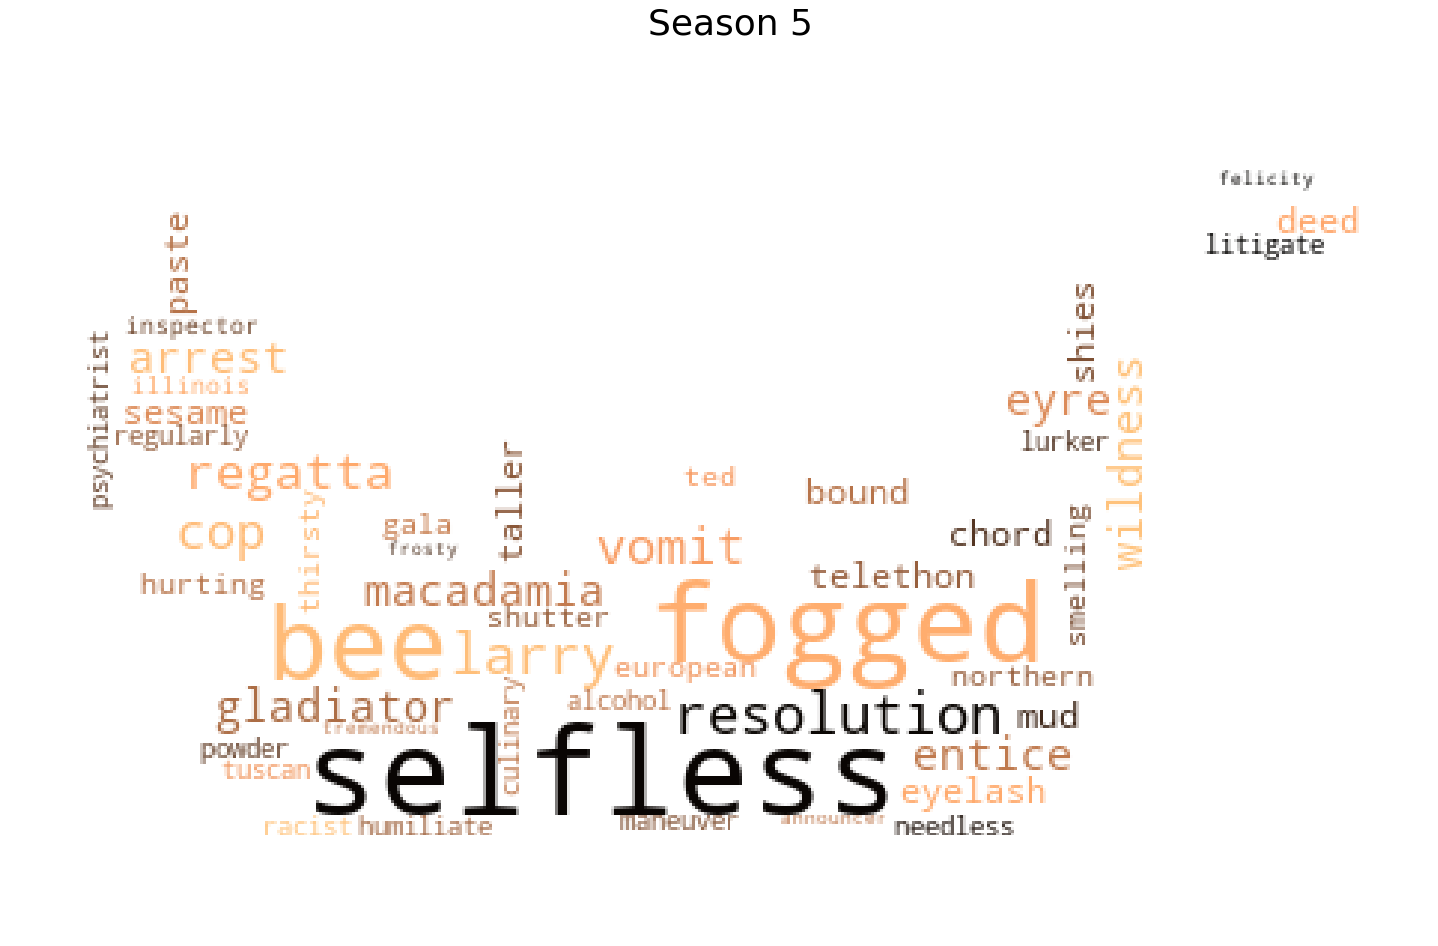

In [17]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'copper',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_s5)));
plt.axis('off');
plt.title('Season 5',fontsize = 36);
#plt.savefig("wordcloud_s5")
plt.show()

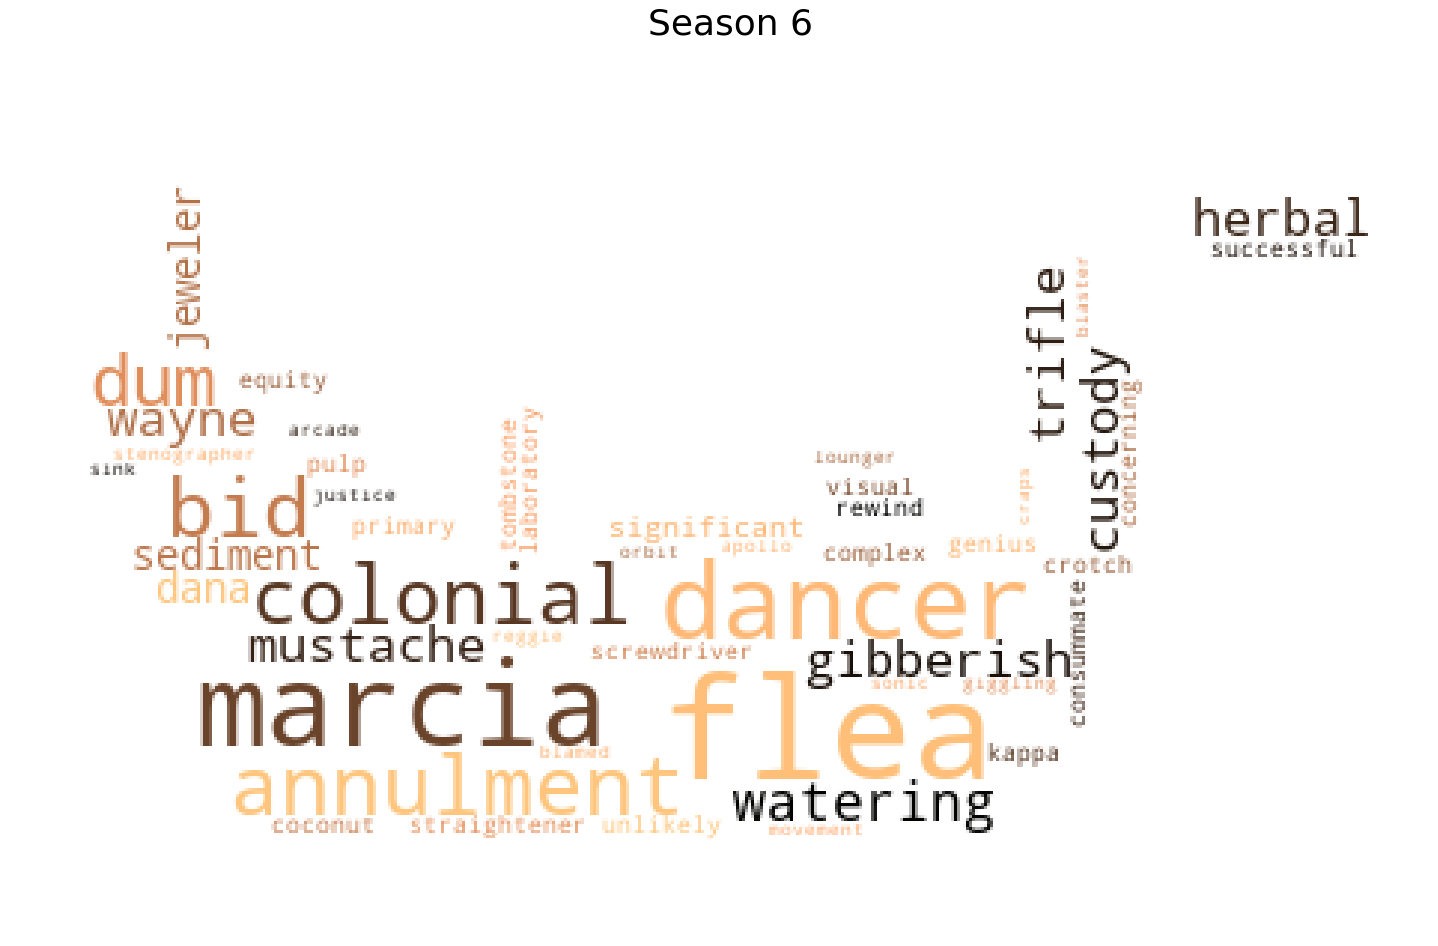

In [18]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'copper',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_s6)));
plt.axis('off');
plt.title('Season 6',fontsize = 36);
#plt.savefig("wordcloud_s6")
plt.show()

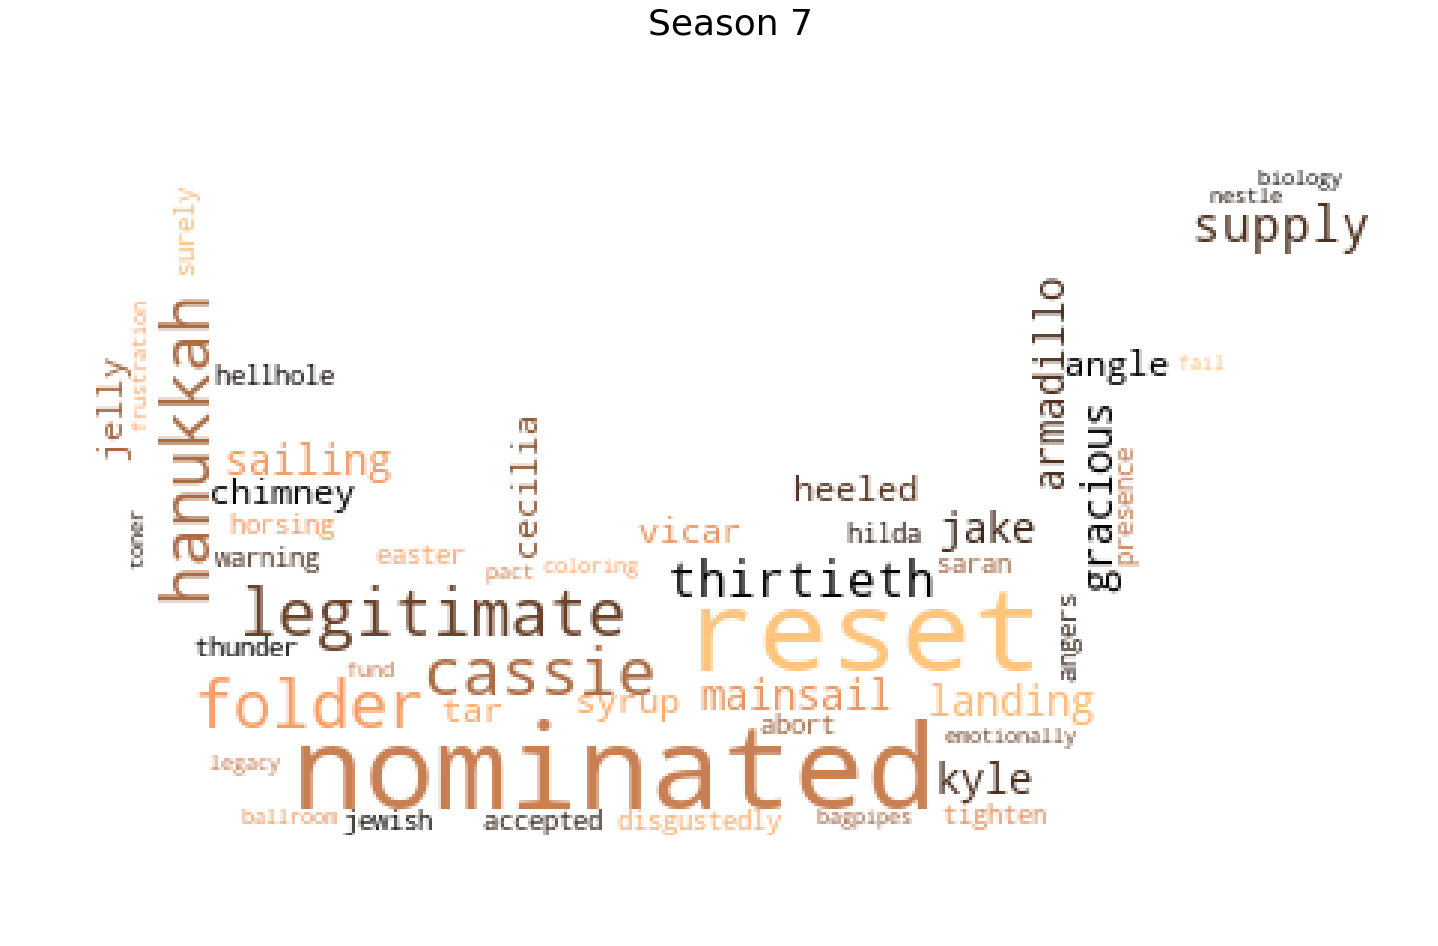

In [19]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'copper',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_s7)));
plt.axis('off');
plt.title('Season 7',fontsize = 36);
#plt.savefig("wordcloud_s7")
plt.show()

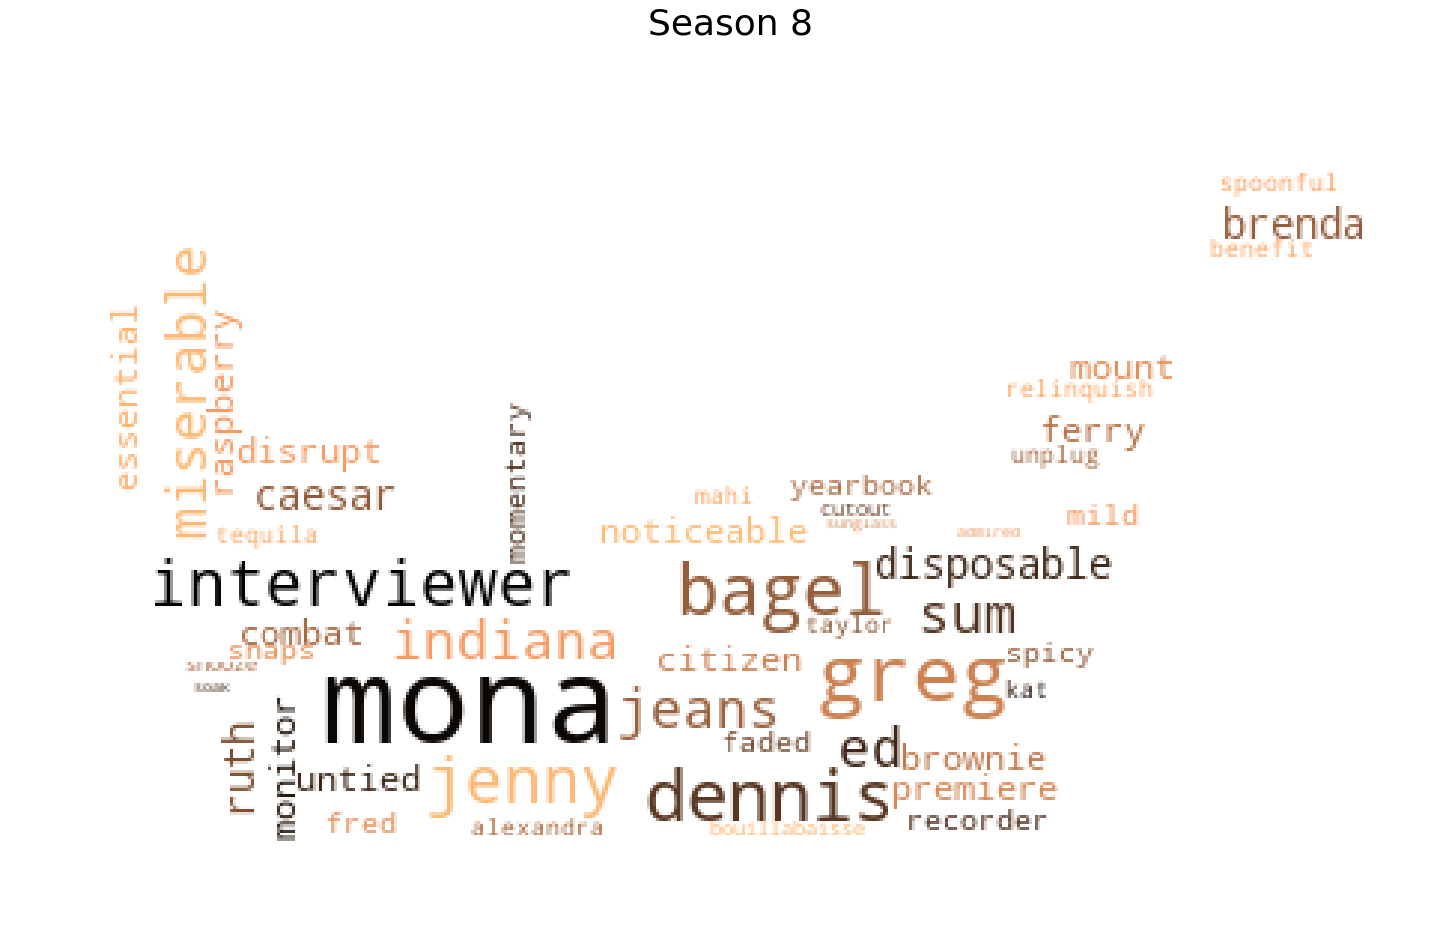

In [20]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'copper',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_s8)));
plt.axis('off');
plt.title('Season 8',fontsize = 36);
#plt.savefig("wordcloud_s8",transparent = True, DPI = 200)
plt.show()

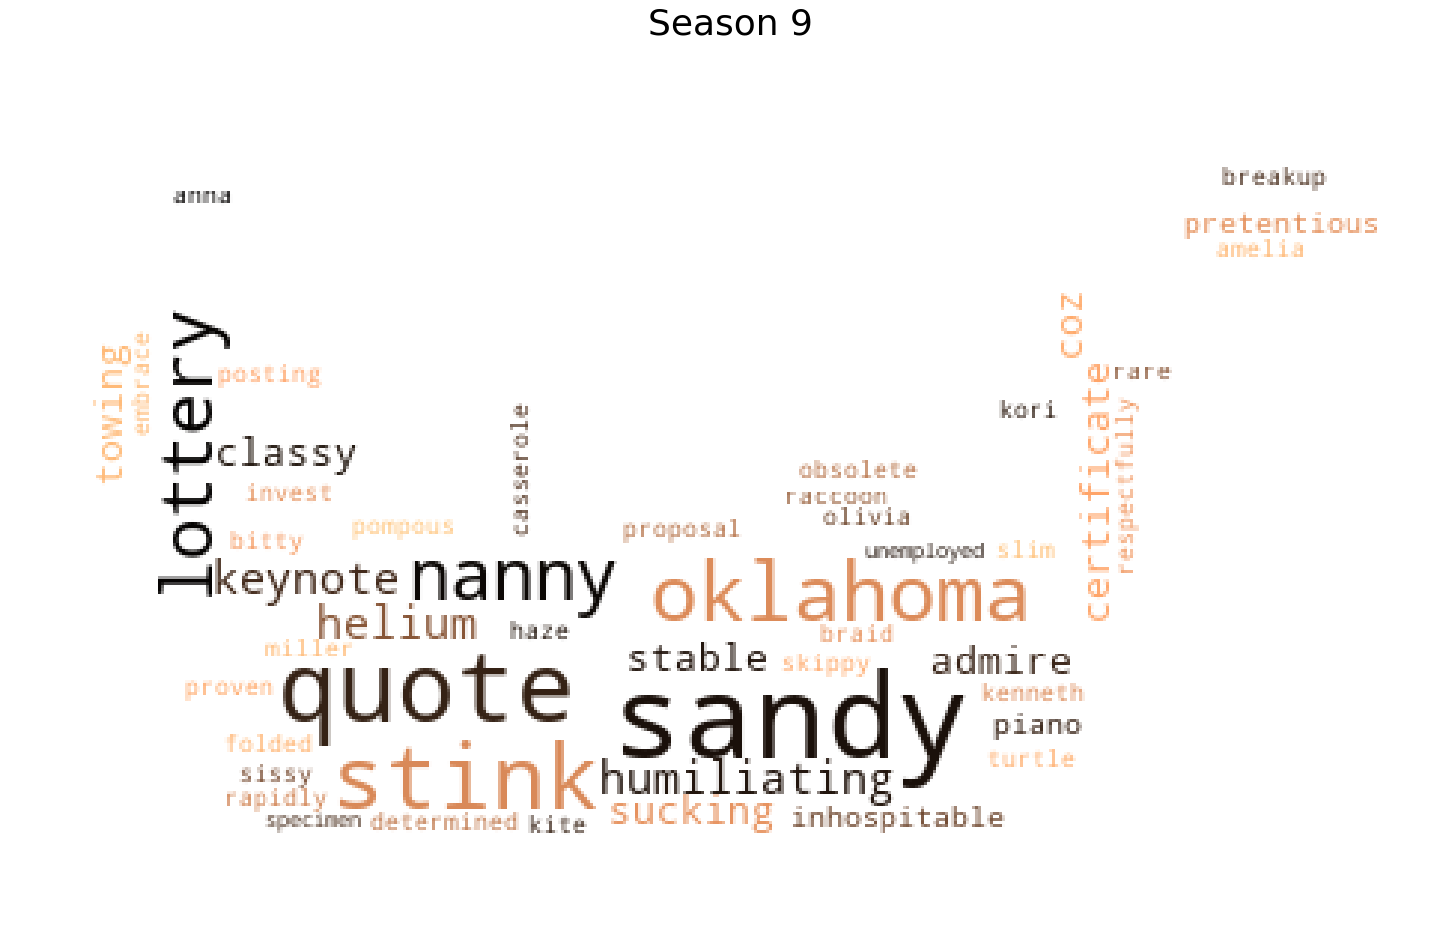

In [21]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'copper',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_s9)));
plt.axis('off');
plt.title('Season 9',fontsize = 36);
#plt.savefig("wordcloud_s9",transparent = True, DPI = 200)
plt.show()

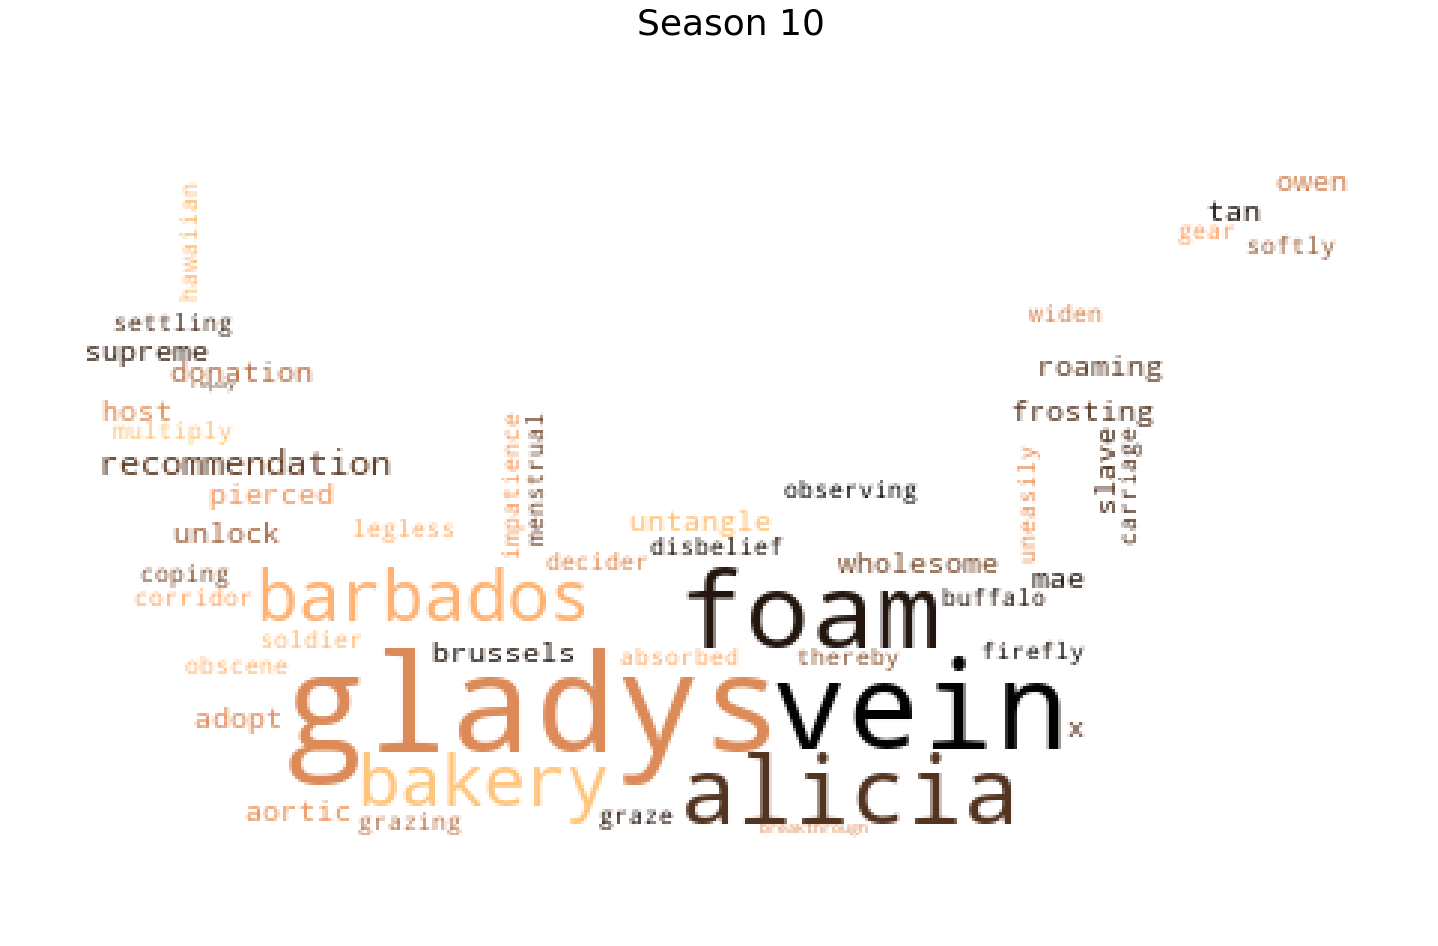

In [22]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'copper',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_s10)));
plt.axis('off');
plt.title('Season 10',fontsize = 36);
#plt.savefig("wordcloud_s10")
plt.show()